# Covariance Conversion

## From resonnance parameters to WMP covariance


### A 1-level-1channel toy Problem

This program implements in Python 3 :
      - a toy-problem for conversion using the contour integral method
      - conversions for poles an residues
      - plots things

NOTE : author is Pablo DUCRU, for any inquires please e-mail at  *** p_ducru@mit.edu ***

In [1]:
## Import Python package for linear algebra
import numpy as np

In [2]:
## Importing Python packages for plotting
#from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
#from matplotlib import cm
#from matplotlib.ticker import LinearLocator, FormatStrFormatter


## Nuclear Cross Section Model (SLBW for this benchmark)

#### SLBW Equations

In [83]:
################################################################################
########### U-238 resonance parameters for first resonance ####################
################################################################################
a_U238 = 9.480000e-4 # (10-12 cm)
ρ0_U238 = 0.002196807122623*0.5
ρ0 = ρ0_U238
## VLAD's VALUES
μ_E0_U238 = 6.674280
μ_Γn_U238 = 1.492300e-3
μ_Γγ_U238 = 2.271100e-2


μ_Γ_U238 = np.array([μ_E0_U238, μ_Γn_U238, μ_Γγ_U238])


# CHANG COV WHEN VLAD GIVES
cov_Γ_U238 = 100*np.diag([ 0.065126369275825552667027773401338945901507564256784,
                        0.0000060974748049746141519539917002332147619120952060896,
                        0.00000043730461508887773583171268036686758829891074351669])**2


################################################################################
############# Macroscopic Cross Sections as function of E ######################
################################################################################

def Σγ(E, Γ): ## The most simple SLBW caputre resonance
    return (np.pi*Γ[1]*Γ[2]/(ρ0**2*E**0.5*Γ[0]**0.5))/((E-Γ[0])**2+((Γ[1]*(E/Γ[0])**(1/2)+ Γ[2])/2)**2)

#### Plotting the cross section

In [4]:
# Energy grid structure
E_max = 10**4 # Minimum energy of the energy groups
E_min = 10**-2 # Maximum energy of the energy groups & the cutoff energy of the fision spectrum
N_g = 1000 # Number of energy groups
E_g = np.logspace(np.log10(E_min),np.log10(E_max),N_g) # Energy groups (here log-spaced) for flux ψ

# number densities (corrected to include the spin statistical factors)
N_densities = np.array([1,(0.124954)*1.0])

# scattering cross section
σ_nn = 0.166810

In [5]:
E_g.shape

(1000,)

In [6]:
E_grid = np.logspace(-2,4,N_g)

In [7]:
E_grid.shape

(1000,)

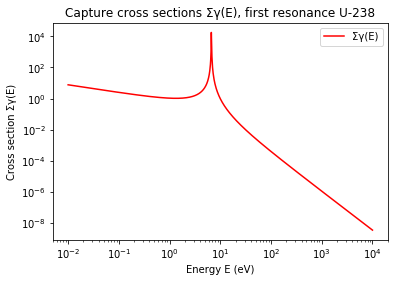

In [8]:
## Plot the mean cross section values. 
titre_Σ = 'Capture cross sections Σγ(E), first resonance U-238'
titre_Σ_pdf = "%s.%s"%(titre_Σ, 'pdf')

#plt.close('all')
# Plotting the cross section
#plt.loglog(E_g , np.array([sum(list(Σ_vector(E_g[g], μ_Γ_all))) for g in range(E_g.size)]) )
plt.loglog(E_g , np.array([Σγ(E_g[g], μ_Γ_U238) for g in range(E_g.size)]) , '-r', label='Σγ(E)') 
plt.ylabel('Cross section Σγ(E)')
plt.xlabel('Energy E (eV)')
plt.title(titre_Σ)
plt.legend()

plt.rcParams['axes.facecolor'] = '0.98'

#### SLBW derivative equations

In [9]:
def dΣγ_dΓ(E, Γ): ## The most simple SLBW caputre resonance
    dΣγ_dEλ = Σγ(E, Γ)*( (-1)/(2*Γ[0]) + Σγ(E, Γ)*(ρ0**2*E**0.5*Γ[0]**(0.5))/(np.pi*Γ[1]*Γ[2])*(2*(E-Γ[0]) + ( Γ[2] + Γ[1]*E**0.5*Γ[0]**(-0.5))*(Γ[2]*E**0.5)/(4*Γ[0]**1.5)) )
    dΣγ_dΓn = Σγ(E, Γ)*( 1/(Γ[1]) - Σγ(E, Γ)*(ρ0**2*E**0.5*Γ[0]**(0.5))/(np.pi*Γ[1]*Γ[2])*(0.5*E**0.5*Γ[0]**(-0.5)*( Γ[2] + Γ[1]*E**0.5*Γ[0]**(-0.5))) )
    dΣγ_dΓγ = Σγ(E, Γ)*( 1/(Γ[2]) - Σγ(E, Γ)*(ρ0**2*E**0.5*Γ[0]**(0.5))/(np.pi*Γ[1]*Γ[2])*(0.5*( Γ[2] + Γ[1]*E**0.5*Γ[0]**(-0.5))) )
    return np.array([dΣγ_dEλ , dΣγ_dΓn , dΣγ_dΓγ])

In [10]:
ε = 0.000001 
Γ_U238_ε_E0 = np.array([μ_E0_U238 + ε, μ_Γn_U238, μ_Γγ_U238])
Γ_U238_ε_Γn = np.array([μ_E0_U238 , μ_Γn_U238 + ε, μ_Γγ_U238])
Γ_U238_ε_Γγ = np.array([μ_E0_U238, μ_Γn_U238, μ_Γγ_U238 + ε])


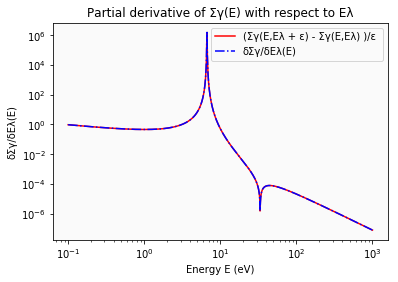

In [11]:
# Energy grid structure
E_max = 10**3 # Minimum energy of the energy groups
E_min = 10**-1 # Maximum energy of the energy groups & the cutoff energy of the fision spectrum
N_g = 1000 # Number of energy groups
E_g = np.logspace(np.log10(E_min),np.log10(E_max),N_g) # Energy groups (here log-spaced) for flux ψ

## Plot the mean cross section values. 
plot_title = 'Partial derivative of Σγ(E) with respect to Eλ'
plot_title_pdf = "%s.%s"%(plot_title, 'pdf')

#plt.close('all')
# Plotting the cross section
#plt.loglog(E_g , np.array([sum(list(Σ_vector(E_g[g], μ_Γ_all))) for g in range(E_g.size)]) )
plt.loglog(E_g , np.abs(np.array([(Σγ(E_g[g], Γ_U238_ε_E0) - Σγ(E_g[g], μ_Γ_U238) )/ε for g in range(E_g.size)])) , '-r', label='(Σγ(E,Eλ + ε) - Σγ(E,Eλ) )/ε ') 
plt.loglog(E_g , np.abs(np.array([ dΣγ_dΓ(E_g[g], μ_Γ_U238)[0] for g in range(E_g.size)])) , '-.b', label='δΣγ/δEλ(E)') 
plt.ylabel('δΣγ/δEλ(E)')
plt.xlabel('Energy E (eV)')
plt.title(plot_title)
plt.legend()

plt.rcParams['axes.facecolor'] = '0.98'

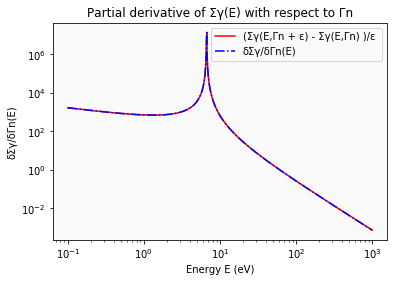

In [12]:
# Energy grid structure
E_max = 10**3 # Minimum energy of the energy groups
E_min = 10**-1 # Maximum energy of the energy groups & the cutoff energy of the fision spectrum
N_g = 1000 # Number of energy groups
E_g = np.logspace(np.log10(E_min),np.log10(E_max),N_g) # Energy groups (here log-spaced) for flux ψ

## Plot the mean cross section values. 
plot_title = 'Partial derivative of Σγ(E) with respect to Γn'
plot_title_pdf = "%s.%s"%(plot_title, 'pdf')

#plt.close('all')
# Plotting the cross section
#plt.loglog(E_g , np.array([sum(list(Σ_vector(E_g[g], μ_Γ_all))) for g in range(E_g.size)]) )
plt.loglog(E_g , np.abs(np.array([(Σγ(E_g[g], Γ_U238_ε_Γn) - Σγ(E_g[g], μ_Γ_U238) )/ε for g in range(E_g.size)])) , '-r', label='(Σγ(E,Γn + ε) - Σγ(E,Γn) )/ε ') 
plt.loglog(E_g , np.abs(np.array([ dΣγ_dΓ(E_g[g], μ_Γ_U238)[1] for g in range(E_g.size)])) , '-.b', label='δΣγ/δΓn(E)') 
plt.ylabel('δΣγ/δΓn(E)')
plt.xlabel('Energy E (eV)')
plt.title(plot_title)
plt.legend()

plt.rcParams['axes.facecolor'] = '0.98'

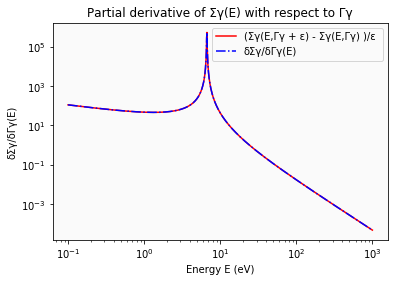

In [13]:
# Energy grid structure
E_max = 10**3 # Minimum energy of the energy groups
E_min = 10**-1 # Maximum energy of the energy groups & the cutoff energy of the fision spectrum
N_g = 1000 # Number of energy groups
E_g = np.logspace(np.log10(E_min),np.log10(E_max),N_g) # Energy groups (here log-spaced) for flux ψ

## Plot the mean cross section values. 
plot_title = 'Partial derivative of Σγ(E) with respect to Γγ'
plot_title_pdf = "%s.%s"%(plot_title, 'pdf')

#plt.close('all')
# Plotting the cross section
#plt.loglog(E_g , np.array([sum(list(Σ_vector(E_g[g], μ_Γ_all))) for g in range(E_g.size)]) )
plt.loglog(E_g , np.abs(np.array([(Σγ(E_g[g], Γ_U238_ε_Γγ) - Σγ(E_g[g], μ_Γ_U238) )/ε for g in range(E_g.size)])) , '-r', label='(Σγ(E,Γγ + ε) - Σγ(E,Γγ) )/ε ') 
plt.loglog(E_g , np.abs(np.array([ dΣγ_dΓ(E_g[g], μ_Γ_U238)[2] for g in range(E_g.size)])) , '-.b', label='δΣγ/δΓγ(E)') 
plt.ylabel('δΣγ/δΓγ(E)')
plt.xlabel('Energy E (eV)')
plt.title(plot_title)
plt.legend()

plt.rcParams['axes.facecolor'] = '0.98'

#### Sampling from resonance parameters

In [14]:
def sample_Γ_res_parameters(mean_Γ_all, cov_Γ_all): ## This implementation cannot take cross-resonance covariance yet
    Γ_sample = np.copy(mean_Γ_all)
    if mean_Γ_all.shape == (3,): ## This means only 1 resonance 
        Γ_sample = np.random.multivariate_normal(mean_Γ_all, cov_Γ_all) # LOG NORMAL mvln = np.exp(mvn) after sampling multivariate normal FOR NEGATIVE WIDTHS
    else:
        for λ in range(mean_Γ_all.shape[0]):
            Γ_sample[λ] = np.random.multivariate_normal(mean_Γ_all[λ], cov_Γ_all[λ]) # LOG NORMAL mvln = np.exp(mvn) after sampling multivariate normal
    return Γ_sample

No handles with labels found to put in legend.


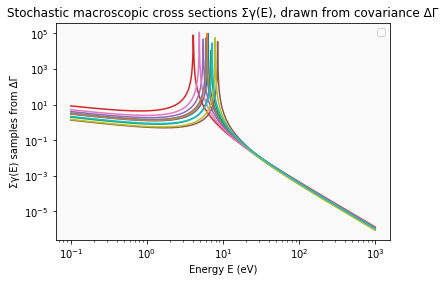

In [15]:
## Plot the cross sections from nuclear data uncertainty
titre_ΔΣ = 'Stochastic macroscopic cross sections Σγ(E), drawn from covariance ΔΓ'
titre_ΔΣ_pdf = "%s.%s"%(titre_ΔΣ, 'pdf')

#plt.close('all')
# Plotting the sampled cross sections
for i in range(10):
    Γ_sample = sample_Γ_res_parameters(μ_Γ_U238, cov_Γ_U238)
    plt.loglog(E_g , np.array([Σγ(E_g[g], Γ_sample) for g in range(E_g.size)])) #, '--r') 
plt.ylabel('Σγ(E) samples from ΔΓ')
plt.xlabel('Energy E (eV)')
plt.title(titre_ΔΣ )
plt.legend()

plt.rcParams['axes.facecolor'] = '0.98'

In [16]:
E_0 = E_g[300]
E_0

1.589282865622978

In [99]:
E_g.shape

(1000,)

In [103]:
np.dot(cov_Γ_U238,dΣγ_dΓ(E_0, μ_Γ_U238))

array([-2.08113859e-01,  2.61081204e-06,  8.82387311e-10])

In [105]:

Σγ_sigma_at_E0

0.10394811607617754

In [115]:
Σγ_local_propagation

array([1.47559725e-013, 1.99754072e-010, 1.08664919e-007, 2.37546699e-005,
       2.08676984e-003, 7.36658191e-002, 1.04501713e+000, 5.95726215e+000,
       1.36469604e+001, 1.25629337e+001, 4.64742211e+000, 6.90874382e-001,
       4.12716636e-002, 9.90765276e-004, 9.55774624e-006, 3.70515287e-008,
       5.77195164e-011, 3.61330941e-014, 9.08978345e-018, 9.18899127e-022,
       3.73291462e-026, 6.09388412e-031, 3.99766357e-036, 1.05386313e-041,
       1.11642125e-047, 4.75267258e-054, 8.13043185e-061, 5.58927204e-068,
       1.54405512e-075, 1.71410044e-083, 7.64672813e-092, 1.37082163e-100,
       9.87534250e-110, 2.85883638e-119, 3.32577106e-129, 1.55475269e-139,
       2.92076220e-150, 2.20494114e-161, 6.68903881e-173, 8.15448144e-185,
       3.99479868e-197, 7.86428718e-210, 6.22142323e-223, 1.97781673e-236,
       2.52666847e-250, 1.29710876e-264, 2.67590347e-279, 2.21835173e-294,
       7.39020165e-310, 0.00000000e+000, 0.00000000e+000])

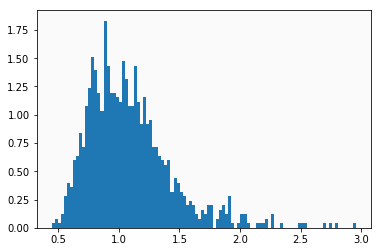

In [117]:
num_bins = 100

Σγ_hist = np.array([Σγ(E_0, sample_Γ_res_parameters(μ_Γ_U238, cov_Γ_U238))  for i in range(1000)])

Σγ_mean = Σγ(E_0, μ_Γ_U238)

Σγ_sigma_at_E0 = np.dot(dΣγ_dΓ(E_0, μ_Γ_U238), np.dot(cov_Γ_U238,dΣγ_dΓ(E_0, μ_Γ_U238)))

Σγ_local_propagation = ((1 / (np.sqrt(2 * np.pi) * Σγ_sigma_at_E0)) *
     np.exp(-0.5 * (1 / Σγ_sigma_at_E0 * (bins - Σγ_mean))**2))**2

ax.plot(bins, Σγ_local_propagation, '--r')

fig, ax = plt.subplots()

n, bins, patches = ax.hist(Σγ_hist, num_bins, density=1)


In [87]:
import cmath

In [90]:
cmath.sqrt(cmath.exp(2*cmath.pi*1j))

(1-1.2246467991473532e-16j)

In [91]:
cmath.polar(cmath.exp(2*cmath.pi*1j))

(1.0, -2.4492935982947064e-16)

In [92]:
cmath.polar(cmath.exp(4*cmath.pi*1j))

(1.0, -4.898587196589413e-16)

In [89]:
cmath.sqrt(cmath.exp(4*cmath.pi*1j))

(1-2.4492935982947064e-16j)

In [ ]:

# example data
mu = 100  # mean of distribution
sigma = 15  # standard deviation of distribution
x = mu + sigma * np.random.randn(437)

num_bins = 50

fig, ax = plt.subplots()

# the histogram of the data
n, bins, patches = ax.hist(x, num_bins, density=1)

# add a 'best fit' line
y = ((1 / (np.sqrt(2 * np.pi) * sigma)) *
     np.exp(-0.5 * (1 / sigma * (bins - mu))**2))
ax.plot(bins, y, '--')
ax.set_xlabel('Smarts')
ax.set_ylabel('Probability density')
ax.set_title(r'Histogram of IQ: $\mu=100$, $\sigma=15$')

# Tweak spacing to prevent clipping of ylabel
fig.tight_layout()
plt.show()

0
0.002849747495791826
1
0.0033762611682676283
2
0.0031682236238781097
3
0.003064298658177665
4
0.0032337888962451914
5
0.0029749148020271686
6
0.0031787516187500526
7
0.0027777725864576047
8
0.003460733215050051


No handles with labels found to put in legend.


9
0.0025362149866149744


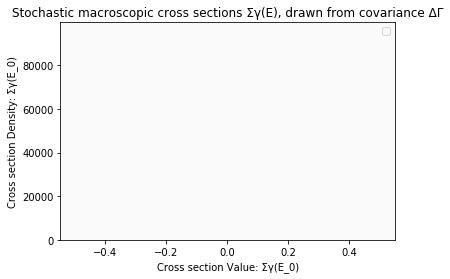

In [72]:
## Plot the cross sections from nuclear data uncertainty
titre_ΔΣ_E0 = 'Capture cross sections Σγ_hist(E), drawn from covariance ΔΓ'
titre_ΔΣ_E0_pdf = "%s.%s"%(titre_ΔΣ_E0, 'pdf')

Σγ_hist = []
# Plotting the sampled cross sections
for i in range(10):
    print(i)
    Γ_sample =  sample_Γ_res_parameters(μ_Γ_U238, cov_Γ_U238)
    Σγ_hist.append(Σγ(E_g[666], Γ_sample))
    print(Σγ(E_g[666], Γ_sample))
    plt.hist( Σγ_hist, 100, density= 1 )# , label='Σγ: hist.')#, '--r', label='Σ_γ: hist.')     
plt.ylabel('Cross section Density: Σγ(E_0)')
plt.xlabel('Cross section Value: Σγ(E_0)')
plt.title(titre_ΔΣ )
plt.legend()
    
plt.rcParams['axes.facecolor'] = '0.98'

## Vector Fitting Algorithm



##### The simplest barycentric SK iterations: no relaxation, no QR, no orthogonal basis, no real numbers

The space of functions we are learning in is that of proper rational fraction of degree zero (poles + offset)

In [19]:
## Generic rational fractions with an offset and an entire part.
# > The entire part is specified by the set of coefficients.
# > If no coefficients are provided (the empty set), the rational function is build with a simple offset, the default value of which is zero.
def rational_function(z, poles, residues, offset=0, poly_coeff=()):
    if poly_coeff == ():
        poly_order = 0
        ## print("The rational_function function was not given an entire polynomial part to build.")
    else:
        poly_order = poly_coeff.shape[0]
    return  np.sum(residues[n]/(z-poles[n]) for n in range(poles.size)) + offset + np.sum(poly_coeff[n]*z**(n+1) for n in range(poly_order))

#### VF algorithm

: Building functions that make up the building blocks of the algorithm

In [20]:
## Create the Y_vector for the LS problem :: Here, we weight it with the sqrt of the rho_k for the system
def vectorize_Y_for_LS(z_train, Y_train, dim_residues):
    number_train_points = Y_train.shape[0]
    sqrt_weights_rho = build_square_weights_rho_k(z_train, Y_train)
    Y_LS_vector = np.zeros([dim_residues*number_train_points],  dtype=np.complex)
    for d in range(dim_residues):
        for k in range(number_train_points):
            Y_LS_vector[d*number_train_points + k] =  sqrt_weights_rho[k]*Y_train[k,d]
    return Y_LS_vector

In [21]:
## define the Cauchy matrix
def Cauchy_matrix(z,p):
    C = np.zeros([z.size , p.size],  dtype=np.complex)
    for k in range(z.size):
        for j in range(p.size):
            C[k,j] = 1/(z[k] - p[j])
    return C

In [22]:
## define the Vandermonde matrix without offset
def Vandermonde_matrix(z,poly_order):
    V = np.zeros([z.size , poly_order],  dtype=np.complex)
    for k in range(z.size):
        for n in range(poly_order):
            V[k,n] = z[k]**(n+1)
    return V

In [23]:
## build the square root of the rho_k weights for the LS system :: linear heteroscedastic case
def build_square_weights_rho_k(z_train, Y_train):
    number_train_points = z_train.size
    sqrt_weights_rho = np.zeros([number_train_points], dtype=np.complex)
    for k in range(number_train_points):
        sqrt_weights_rho[k] =  1.0/(np.sqrt(number_train_points*(np.linalg.norm(Y_train[k]))))   ## For heteroskedastic (np.sqrt(np.linalg.norm(Y_train[k])))))  ## * (np.linalg.norm(Y_train[k])) ))) ## for linear heteroscedastic case, add: *np.linalg.norm(Y_train[k]))
    return sqrt_weights_rho

In [24]:
## build the matrix of the barycentric LS system:
def build_barycentric_LS_matrix(z_train, Y_train, learn_poles, poly_order=0):
  dim_residues = Y_train[0].size
  number_train_points = z_train.size
  number_poles_learn = learn_poles.size
  sqrt_weights_rho = build_square_weights_rho_k(z_train, Y_train) 
  C = Cauchy_matrix(z_train, learn_poles)
  V = Vandermonde_matrix(z_train, poly_order)
  LS_matrix = np.zeros([dim_residues*number_train_points, dim_residues*(number_poles_learn+1+poly_order) + number_poles_learn],  dtype=np.complex)
  for d in range(dim_residues):
      for k in range(number_train_points):
          for p in range(number_poles_learn):
              LS_matrix[d*number_train_points + k, d*number_poles_learn + p] = sqrt_weights_rho[k]*C[k,p]
              for n in range(poly_order):
                  LS_matrix[d*number_train_points + k, dim_residues*number_poles_learn + d*poly_order + n] = sqrt_weights_rho[k]*V[k,n] 
              LS_matrix[d*number_train_points + k, dim_residues*(number_poles_learn+poly_order) + d] = sqrt_weights_rho[k]*1 
              LS_matrix[d*number_train_points + k, dim_residues*(number_poles_learn+poly_order+1) + p] = -sqrt_weights_rho[k]*Y_train[k,d]*C[k,p]
  return LS_matrix

In [25]:
## build the matrix of the simple LS system:
def build_LS_matrix(z_train, Y_train, learn_poles, poly_order=0):
  dim_residues = Y_train[0].size
  number_train_points = z_train.size
  number_poles_learn = learn_poles.size
  sqrt_weights_rho = build_square_weights_rho_k(z_train, Y_train) 
  C = Cauchy_matrix(z_train, learn_poles)
  V = Vandermonde_matrix(z_train,poly_order)
  LS_matrix = np.zeros([dim_residues*number_train_points, dim_residues*(number_poles_learn+1+poly_order) ],  dtype=np.complex)
  for d in range(dim_residues):
      for k in range(number_train_points):
          for p in range(number_poles_learn):
              LS_matrix[d*number_train_points + k, d*number_poles_learn + p] = sqrt_weights_rho[k]*C[k,p]  
              for n in range(poly_order):
                  LS_matrix[d*number_train_points + k, dim_residues*number_poles_learn + d*poly_order + n] = sqrt_weights_rho[k]*V[k,n] 
              LS_matrix[d*number_train_points + k, dim_residues*(number_poles_learn+poly_order) + d] = sqrt_weights_rho[k]*1 
  return LS_matrix

In [26]:
## Function that vectorizes the residues and offset for the problem
def build_LS_vector(residues, offset, poly_coeff=()):
    if type(poly_coeff) == tuple:
        poly_order = 0
        #print("The build_LS_vector function was not given an entire polynomial part to build.") 
    else:
        poly_order = poly_coeff.shape[0]
    number_poles = residues.shape[0]
    dim_residues = residues.shape[1]
    LS_vector    = np.zeros([dim_residues*(number_poles+poly_order+1)], dtype=np.complex)
    for d in range(dim_residues):
        for p in range(number_poles):
            LS_vector[d*number_poles + p] = residues[p][d]
        for n in range(poly_order):
            LS_vector[dim_residues*number_poles + d*poly_order + n] = poly_coeff[n][d]
    LS_vector[dim_residues*(number_poles+poly_order):LS_vector.size] = offset
    return LS_vector

In [27]:
## Function that takes the vectorized solution and spits out the different elements
def extract_from_LS_vector(LS_vector, number_poles, dim_residues , poly_order=0):
    residues = np.zeros([number_poles, dim_residues], dtype=np.complex)
    poly_coeff = np.zeros([poly_order, dim_residues], dtype=np.complex)
    offset   = np.zeros([dim_residues], dtype = np.complex)
    for d in range(dim_residues): 
        for p in range(number_poles):
            residues[p][d] = LS_vector[d*number_poles + p]
        for n in range(poly_order):
            poly_coeff[n][d] = LS_vector[dim_residues*number_poles + d*poly_order + n]
    offset = LS_vector[dim_residues*(number_poles+poly_order) : LS_vector.size]
    if poly_order == 0:
        return residues, offset
    else:
        return residues, poly_coeff, offset

**The Vector Fitting algorithm: **

The algorithm takes as input a training set {z_k, Y_k}, composed of training vectors {Y_k}, matched on a grid {z_k}.

A standard number of VF iterations is 10, which usually suffices to converge the poles. 

Our implementation does not require the input of an initial guess. If you do not give one, the program will come up with a linearly spaced complex diagonal along the rectangle of the mesh of training points on the complex plane. 

In [28]:
def VF_algorithm(z_train, Y_train, number_VF_iteration, poly_order = 0 , *arguments ):
    ## build the Y vector to solve for:
    dim_residues = Y_train[0].size
    number_train_points = z_train.size
    Y_LS_vector = vectorize_Y_for_LS(z_train, Y_train, dim_residues)
    ## Initialize the poles
    if arguments == ():
        raise AssertionError("The VF_algorithm function must be given either a number of poles, or an array of initial poles guess") 
    for arg in arguments:
        if type(arg) == np.ndarray: ## was given an initial guess as argument
            print(" The VF_algorithm was provided an initial guess for the poles")
            learn_poles = arg
            number_poles = learn_poles.size
        elif type(arg) == int: ## was given a number of poles without any initial guess
            print("The VF_algorithm was provided a number of poles to learn and is generating an initial guess")
            number_poles = arg
            if (np.amax(np.imag(z_train)) - np.amin(np.imag(z_train))) == 0: ## only real training data
                print("The training points are only along the real axis, and the initial guesses are generated accordingly with a shift")
                learn_poles = np.linspace(np.amin(np.real(z_train))+1/(10*(np.amax(np.real(z_train)) - np.amin(np.real(z_train)))),np.amax(np.real(z_train)) + 1/(10*(np.amin(np.real(z_train))-np.amax(np.real(z_train)))) , number_poles) + 1j*np.linspace(np.amin(np.imag(z_train)),np.amax(np.imag(z_train)), number_poles)
            elif (np.amax(np.real(z_train)) - np.amin(np.real(z_train)) ) == 0:
                print("The training points are exactly along the imaginary axis, and the initial guesses are generated accordingly with a shift")
                learn_poles = np.linspace(np.amin(np.real(z_train)),np.amax(np.real(z_train)) , number_poles) + 1j*np.linspace(np.amin(np.imag(z_train)) + 1/(10*(np.amax(np.imag(z_train)) - np.amin(np.imag(z_train)))) ,np.amax(np.imag(z_train)) - 1/(10*(np.amax(np.imag(z_train)) - np.amin(np.imag(z_train)))), number_poles)
            else:
                learn_poles = np.linspace(np.amin(np.real(z_train))+1/(10*(np.amax(np.real(z_train))-np.amin(np.real(z_train)))),np.amax(np.real(z_train)) - 1/(10*(np.amax(np.real(z_train)) - np.amin(np.real(z_train)))) , number_poles) + 1j*np.linspace(np.amin(np.imag(z_train)) + 1/(10*(np.amax(np.imag(z_train)) - np.amin(np.imag(z_train)))), np.amax(np.imag(z_train)) -  1/(10*(np.amax(np.imag(z_train)) - np.amin(np.imag(z_train)))) , number_poles)
    ## POLE CONVERGENCE: Run the VF iterations 
    for i in range(number_VF_iteration):
        ## build the barycentric L2 system
        barycentric_LS_matrix = build_barycentric_LS_matrix(z_train, Y_train, learn_poles, poly_order)
        ## solve the barycentric L2 system
        barycentric_LS_vector , barycentric_LS_residual , barycentric_LS_rank , barycentric_LS_singular_values = np.linalg.lstsq(barycentric_LS_matrix, Y_LS_vector, poly_order)
        ## extract the barycentric residues
        barycentric_residues = barycentric_LS_vector[dim_residues*(learn_poles.size + poly_order +1):barycentric_LS_vector.size]
        ## Build the matrix the spectrum of which will be the recolated poles
        P = np.diag(learn_poles) - np.tensordot(barycentric_residues,np.ones([barycentric_residues.size], dtype=np.complex),0)
        ## Solve the spectral problem & relocate poles
        learn_poles , eigenvectors = np.linalg.eig(P)
        ## convergence criteria
    ## RESIDUES EXTRACTION: Solve the LS system
    ## build the quadratic system
    LS_matrix = build_LS_matrix(z_train, Y_train, learn_poles, poly_order)
    ## solve the quadratic L2 system
    LS_vector, LS_residual, LS_rank , LS_singular_values = np.linalg.lstsq(LS_matrix, Y_LS_vector) ## np.linalg.solve(A.T.dot(A) + lamb * np.identity(n_col), A.T.dot(y)) For Tichonov
    ## extract the residues, polynomial coefficients and offset
    if poly_order == 0:
        VF_poly_coeff= np.array([ 0.0 for n in range(poly_order)])
        VF_residues , VF_offset = extract_from_LS_vector(LS_vector, learn_poles.size, dim_residues)
        return learn_poles, VF_residues, VF_poly_coeff, VF_offset, LS_residual, barycentric_residues ## Artificially added an emplty set of VF_poly_coeff for homogeneity
    else:
        VF_residues , VF_poly_coeff, VF_offset = extract_from_LS_vector(LS_vector, learn_poles.size, dim_residues, poly_order)
        return learn_poles, VF_residues, VF_poly_coeff, VF_offset, LS_residual, barycentric_residues

## VF SLBW for mean poles and residues


Generate training points from the cross section

In [29]:
E_max_train = 10**5 # Minimum energy of the energy groups
E_min_train = 10**-3 # Maximum energy of the energy groups & the cutoff energy of the fision spectrum
N_g_train = 10000 # Number of energy groups
z_train = np.logspace(np.log10(E_min_train),np.log10(E_max_train),N_g_train) # Energy groups (here log-spaced) for flux ψ
Y_train1 = np.array([z_train[g]**0.5*Σγ(z_train[g], μ_Γ_U238) for g in range(z_train.size)]) #if you want


In [30]:
Y_train = np.transpose(np.array([Y_train1, Y_train1]))

VF algorithm results

In [31]:
VF_poles, VF_residues, VF_poly_coeff, VF_offset, VF_residual, barycentric_residues = VF_algorithm(z_train, Y_train, 100, 0, 2) ## add VF_poly_coeff when poly_order not zero 

The VF_algorithm was provided a number of poles to learn and is generating an initial guess
The training points are only along the real axis, and the initial guesses are generated accordingly with a shift


/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:42: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


In [32]:
## VF results
z_train  ## for complex values : 2*np.random.rand(number_CV_points)*np.exp(1j*2*np.pi*np.random.rand(number_CV_points))
dim_residues = Y_train[0].size
Y_VF = np.zeros([z_train.size, dim_residues] , dtype=complex) ## VF solution
for k in range(z_train.size):
    Y_VF[k] = z_train[k]**(-0.5)*rational_function(z_train[k], VF_poles, VF_residues, VF_offset, VF_poly_coeff) # add when poly_order not zero : VF_poly_coeff)

/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  """
/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  # Remove the CWD from sys.path while we load stuff.


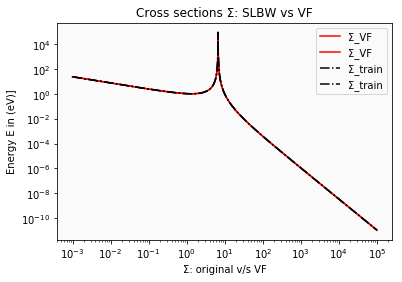

In [33]:
## Plotting the VF results v/s the true model data (log-space data is in absolute value)
fig_true_vs_VF = plt.figure()
plt.loglog(z_train, np.real(np.array([Y_VF[g] for g in range(z_train.size)])), '-r', label='Σ_VF')
plt.loglog(z_train, np.real(np.array([z_train[g]**(-0.5)*Y_train[g] for g in range(z_train.size)])), '-.k', label='Σ_train')
plt.xlabel('Σ: original v/s VF')
plt.ylabel('Energy E in (eV)]')
plot_title = 'Cross sections Σ: SLBW vs VF'
plt.title(plot_title)
plt.legend()
#plt.show()
plt.rcParams['axes.facecolor'] = '0.98'


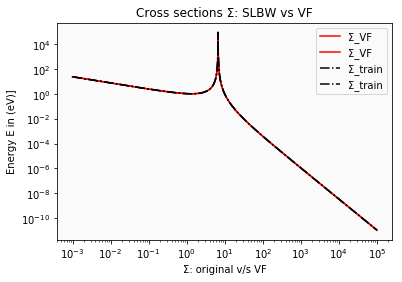

In [34]:
## Plotting the VF results v/s the true model data (log-space data is in absolute value)
fig_true_vs_VF = plt.figure()
plt.loglog(z_train, np.abs(np.array([Y_VF[g] for g in range(z_train.size)])), '-r', label='Σ_VF')
plt.loglog(z_train, np.abs(np.array([z_train[g]**(-0.5)*Y_train[g] for g in range(z_train.size)])), '-.k', label='Σ_train')
plt.xlabel('Σ: original v/s VF')
plt.ylabel('Energy E in (eV)]')
plot_title = 'Cross sections Σ: SLBW vs VF'
plt.title(plot_title)
plt.legend()
#plt.show()
plt.rcParams['axes.facecolor'] = '0.98'


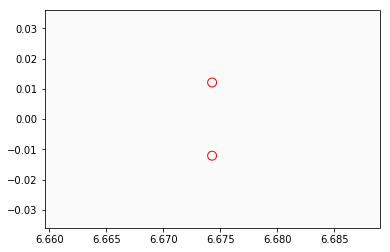

In [35]:
plt.scatter(np.real(VF_poles), np.imag(VF_poles), s=80, facecolors='none', edgecolors='r')
plt.show()

In [36]:
VF_poles

array([6.67427932+0.01210165j, 6.67427932-0.01210165j])

In [37]:
VF_offset

array([5.47522444e-12+2.27373675e-13j, 5.51171185e-12-3.07349999e-15j])

In [38]:
VF_poly_coeff

array([], dtype=float64)

## Contour Integrals


In [39]:
def Σγs(s):
    return Σγ(s,μ_Γ_U238)

In [40]:
def f_flat(z):
    return np.array([1+1j, 1-1j])

In [41]:
def rat1(z):
    return 10 + (1+1j)/(z-1) + (2+2*1j)/(z-1)**2

In [42]:
def divide_by_z_pow_n(f,n):
    def z_pow_n(z):
        return f(z)/(z**n)
    return z_pow_n

In [43]:
def multiply_by_z_min_p(f,p):
    def z_pow_n(z):
        return f(z)*(z-p)
    return z_pow_n

In [44]:
def rat2(z):
    return np.array([(1+1j)/(1 - z), (1-1j)/(1j - z)])

In [45]:
def sqrt_vs_pole(z):
    return np.array([(1+1j)/(z), (1-1j)/(z**(0.5))])

In [46]:
## Cauchy Residues Theorem
def Cauchy_residues_extraction(f,p, N_contour = 10000 , ε = 0.00001):
    contour_integral = f(p+ε)*complex(0.0)
    for n in range(N_contour):
           contour_integral += (ε/N_contour)*f(p+ε*np.exp(2*np.pi*1j*(n/N_contour)))*np.exp(2*np.pi*1j*(n/N_contour))
    return contour_integral         

In [47]:
Cauchy_residues_extraction(f_flat, 1+1j)

array([ 2.15687345e-22-7.68243994e-22j, -7.68243994e-22-2.15687345e-22j])

In [48]:
Cauchy_residues_extraction(rat2, 1+1j)

array([ 5.18869719e-21-2.42781646e-20j, -2.09347005e-20+2.36681189e-20j])

In [49]:
Cauchy_residues_extraction(rat2, 1)

array([-1.00000000e+00-1.00000000e+00j,  5.54810716e-21-9.01478112e-21j])

In [50]:
Cauchy_residues_extraction(rat2, 1j)

array([-3.64566264e-21+3.94110203e-21j, -1.00000000e+00+1.00000000e+00j])

In [51]:
Cauchy_residues_extraction(rat1, 1+1j)

(-6.678987137998167e-20+8.101158765160587e-20j)

In [52]:
Cauchy_residues_extraction(divide_by_z_pow_n(rat1,1), 0)

(11.000000000000009+1.0000000000000049j)

In [53]:
Cauchy_residues_extraction(divide_by_z_pow_n(rat1,1), 2)

(-3.5673818277574425e-20-1.4180522677119064e-19j)

In [54]:
Cauchy_residues_extraction(multiply_by_z_min_p(rat1,1), 0)

(-4.2260657495334184e-20-2.4048808064392e-19j)

In [55]:
Cauchy_residues_extraction(multiply_by_z_min_p(rat1,1), 1)

(1.9999999999999978+2.000000000000001j)

In [56]:
Cauchy_residues_extraction(sqrt_vs_pole, 0)

array([1.        +1.j        , 0.00201348-0.00201285j])

In [57]:
def Cauchy_residues_extraction_2_turns(f,p, N_contour = 100000 , ε = 0.001):
    contour_integral = f(p+ε)*complex(0.0)
    for n in range(N_contour):
           contour_integral += (2*ε/N_contour)*f(p+ε*np.exp(4*np.pi*1j*(n/N_contour)))*np.exp(4*np.pi*1j*(n/N_contour))
    return contour_integral/2

In [58]:
Cauchy_residues_extraction_2_turns(sqrt_vs_pole, 0)

array([1.        +1.j        , 0.02013232-0.02013105j])

In [59]:
np.angle((1-1j)**(0.5))

-0.3926990816987242

In [60]:
np.angle(np.exp(3*np.pi*1j))

3.1415926535897927

In [61]:
def Cauchy_residues_extraction_2_turns(f,p, N_contour = 100000 , ε = 0.001):
    contour_integral = f(p+ε)*complex(0.0)
    for n in range(N_contour):
           contour_integral += (ε/N_contour)*f(p+ε*np.exp(2*np.pi*1j*(n/N_contour)))*np.exp(2*np.pi*1j*(n/N_contour)) - (ε/N_contour)*f(p+ε*np.exp(2*np.pi*1j*(n/N_contour)))*np.exp(2*np.pi*1j*(n/N_contour)) 
    return contour_integral/2

In [62]:
Cauchy_residues_extraction_2_turns(sqrt_vs_pole, 0)

array([0.+0.j, 0.+0.j])

### Sensitivities by Contour Integrals

In [63]:
def dΣγ_dΓ_complex(E): ## The most simple SLBW caputre resonance
    return dΣγ_dΓ(E, μ_Γ_U238)

In [64]:
C_z_p = Cauchy_residues_extraction(multiply_by_z_min_p(dΣγ_dΓ_complex,VF_poles[0]),VF_poles[0])

In [65]:
C_z_p

array([ -0.92948177-5.46309760e+02j, 273.15517417+1.52691082e-02j,
       273.15486678-2.32370232e-01j])

In [66]:
C_at_p = Cauchy_residues_extraction(dΣγ_dΓ_complex,VF_poles[0])

In [67]:
C_at_p

array([ 1.48413615e-01+4.59730562e+01j, -3.31888837e+02-3.43513965e+05j,
       -2.18077548e+01-1.48309305e+03j])

In [68]:
C_by_z_at_0 = Cauchy_residues_extraction(divide_by_z_pow_n(dΣγ_dΓ_complex,1), 0)

In [69]:
C_by_z_at_0 

array([-5.78259281e+01+9.08319944e-03j,  1.03450209e+05-1.62498236e+01j,
        6.79749255e+03-1.06774124e+00j])

In [70]:
VF_offset

array([5.47522444e-12+2.27373675e-13j, 5.51171185e-12-3.07349999e-15j])

In [71]:
def sensitivities_δΠ_δΓ(dΣγ_dΓ, Γ , Π ):
    return 'NOT CODED YET'